<a href="https://colab.research.google.com/github/Raijin-ZD/TwitterSentimentAnalysis/blob/main/TwitterSentimentAnalysisNltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data = pd.read_csv("/content/train.csv", encoding='ISO-8859-1')

In [ ]:
data.head(5)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
data.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [ ]:
data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [ ]:
nullrow = data[data["text"].isnull()]
nullrow.head(3)


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
314,fdb77c3752,NaN,NaN,neutral,night,31-45,Namibia,2540905,823000.0,3


In [ ]:
data = data.dropna(subset=['text'])


In [ ]:
data = data[['sentiment','text','selected_text']]

In [ ]:
data.head(5)

,sentiment,text,selected_text
0,neutral,"I`d have responded, if I were going","I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD
2,negative,my boss is bullying me...,bullying me
3,negative,what interview! leave me alone,leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t...","Sons of ****,"


Replaced the {'negative': 0 , 'neutral': 1 , 'positive': 2}

In [ ]:
data["sentiment"].value_counts().sort_values()


negative     7781
positive     8582
neutral     11117
Name: sentiment, dtype: int64

In [ ]:
replacement_map = {'neutral': 1, 'positive': 2, 'negative': 0}
data['sentiment'] = data['sentiment'].replace(replacement_map)

In [ ]:
data["sentiment"].value_counts().sort_values()


0     7781
2     8582
1    11117
Name: sentiment, dtype: int64

0:NEGATIVE

1:NETURAL

2:POSITIVE

Text(0, 0.5, 'Count')

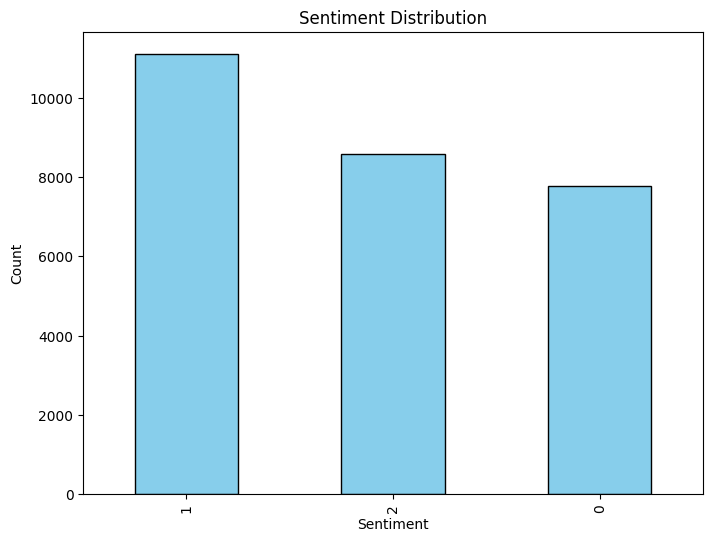

In [ ]:
value_counts = data["sentiment"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

In [ ]:
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub("[0-9]+"," ",text)

    # Remove URLs
    text = ' '.join(word for word in text.split() if not word.startswith('http'))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove special characters and punctuation
    tokens = [word for word in tokens if word.isalnum()]

    tokens = [word for word in tokens if not word.isdigit()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Combine tokens into cleaned text
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply the preprocessing function to the 'text' column and store the result in a new column
data['cleaned_selected_text'] = data['selected_text'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
print("Preprocessed Data Sample:\n", data[['cleaned_selected_text', 'selected_text']].head())


<ipython-input-20-c49def621177>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Preprocessed Data Sample:
   cleaned_selected_text                        selected_text
0       responded going  I`d have responded, if I were going
1              sooo sad                             Sooo SAD
2              bullying                          bullying me
3           leave alone                       leave me alone
4                   son                        Sons of ****,


In [ ]:
data.head()

,sentiment,text,selected_text,cleaned_selected_text
0,1,"I`d have responded, if I were going","I`d have responded, if I were going",responded going
1,0,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,sooo sad
2,0,my boss is bullying me...,bullying me,bullying
3,0,what interview! leave me alone,leave me alone,leave alone
4,0,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",son


In [ ]:
vocabs = {word for sent in data['cleaned_selected_text'] for word in sent.split()}
len(vocabs)

14686

In [ ]:
corpus = data['cleaned_selected_text']
#cleaned_text
#selected_text
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=8000, ngram_range=(1, 3))

# Fit and transform the vectorizer on your corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame (for visualization or further analysis)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

   aaron   ab  abandoned  abby  able  able get  able go  able talk  \
0    0.0  0.0        0.0   0.0   0.0       0.0      0.0        0.0   
1    0.0  0.0        0.0   0.0   0.0       0.0      0.0        0.0   
2    0.0  0.0        0.0   0.0   0.0       0.0      0.0        0.0   
3    0.0  0.0        0.0   0.0   0.0       0.0      0.0        0.0   
4    0.0  0.0        0.0   0.0   0.0       0.0      0.0        0.0   

   absolutely  abt  ...  yum yum  yumm  yummy  yup  zealand  zelda  zero  \
0         0.0  0.0  ...      0.0   0.0    0.0  0.0      0.0    0.0   0.0   
1         0.0  0.0  ...      0.0   0.0    0.0  0.0      0.0    0.0   0.0   
2         0.0  0.0  ...      0.0   0.0    0.0  0.0      0.0    0.0   0.0   
3         0.0  0.0  ...      0.0   0.0    0.0  0.0      0.0    0.0   0.0   
4         0.0  0.0  ...      0.0   0.0    0.0  0.0      0.0    0.0   0.0   

   zombie  zone  zoo  
0     0.0   0.0  0.0  
1     0.0   0.0  0.0  
2     0.0   0.0  0.0  
3     0.0   0.0  0.0  
4     0

In [ ]:
labels = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

In [ ]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train the model on the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8029475982532751
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1572
           1       0.78      0.85      0.81      2236
           2       0.87      0.78      0.83      1688

    accuracy                           0.80      5496
   macro avg       0.81      0.80      0.80      5496
weighted avg       0.81      0.80      0.80      5496



In [ ]:
naive_bayes = MultinomialNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7745633187772926
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.62      0.72      1572
           1       0.70      0.88      0.78      2236
           2       0.85      0.78      0.81      1688

    accuracy                           0.77      5496
   macro avg       0.80      0.76      0.77      5496
weighted avg       0.79      0.77      0.77      5496



In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,  # You can adjust the number of trees in the forest
                                      random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7905749636098981
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1572
           1       0.78      0.84      0.81      2236
           2       0.86      0.77      0.81      1688

    accuracy                           0.79      5496
   macro avg       0.79      0.78      0.79      5496
weighted avg       0.79      0.79      0.79      5496



In [ ]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf',  # i tried 'linear', 'rbf', 'poly' the best one was rbf
                     random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8049490538573508
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1572
           1       0.76      0.89      0.82      2236
           2       0.89      0.77      0.83      1688

    accuracy                           0.80      5496
   macro avg       0.82      0.79      0.80      5496
weighted avg       0.81      0.80      0.80      5496



In [ ]:
from google.colab import drive
drive.mount("ziad")

Mounted at ziad


In [ ]:
data.to_csv("SA_train.csv")